In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import random
import string
import copy

In [2]:
sudoku_problem = []
sudoku_solve = []
value = []
fixed = [[False,False,False,False,False,False,False,False,False],[False,False,False,False,False,False,False,False,False],[False,False,False,False,False,False,False,False,False],[False,False,False,False,False,False,False,False,False],[False,False,False,False,False,False,False,False,False],[False,False,False,False,False,False,False,False,False],[False,False,False,False,False,False,False,False,False],[False,False,False,False,False,False,False,False,False],[False,False,False,False,False,False,False,False,False]]
element_mark = []
#Backtracking algorithm for sudoku.
#ready for problem to put fixed values.

        

def solve(v):
    global value
    global fixed
    value = copy.deepcopy(v)
    ready()
    posElement=[]
    i=0
    j=0
    print("")
    while(i<9):
        try:
            try:
                if(len(posElement[(i*9)+j])>=0):
                    pass
            except:
                posElement.append(getposElement(value,i,j))
            if(len(posElement[(i*9)+j])>0):
                if(not fixed[i][j]):
                    value[i][j] = copy.deepcopy(posElement[(i*9)+j].pop())
            else:
                raise ValueError
        except:
            while(True):
                if(i == 0 and j == 0) :
                    print("Unsolvable")
                    return
                elif(j == 0 and i > 0):
                    posElement.pop()
                    if(not fixed[i][j]):
                        value[i][j] = 0
                    i -= 1
                    j = 8
                elif(j>0):
                    posElement.pop()
                    if(not fixed[i][j]):
                        value[i][j] = 0
                    j -= 1
                if(j == -1):
                    j = 1
                if(not fixed[i][j]):
                    value[i][j] = 0
                    j -= 1
                    break
        j += 1
        if(j==9):
            i += 1
            j = 0
    print_value()
def ready():
    global value
    global fixed
    for i in range (9):
        for j in range (9):
            if(value[i][j] != 0):
                fixed[i][j] = True
            else:
                fixed[i][j] = False
    
def checkRate():
    global value
    cnt = 81
    for i in range(9):
        for j in range(9):
            if(value[i][j] == 0):
                cnt -= 1
    return cnt

    

def getposElement(value,i,j):
    posv = []
    ins = value[i][j]
    for k in range(1,10,1):
        value[i][j] = k 
        if(checkElement(i,j)):
            posv.append(k)
    value[i][j] = ins
    return posv

def checkElement(i,j):
    global value
    checkFlag = True
    rowDif = i%3
    colDif = j%3
    #Check column element
    for column in range (9):
        if(value[i][j]==value[i][column]):
            if(column != j):
                checkFlag = False
    #Check row element
    for row in range (9):
        if(value[i][j]==value[row][j]):
            if(row != i):
                checkFlag = False

    #Check square element
    for row in range (3):
        for column in range(3):
            if(value[i][j]==value[i-rowDif+row][j-colDif+column]):
                if(i-rowDif+row != i and j-colDif+column != j):
                    checkFlag = False
    return checkFlag

def print_value():
    global value
    cnt = 0
    for i in value:
        print(str(i)+" ")
        cnt += 1
        if(cnt%9 == 0):
            print("\n")

In [3]:
def deleteLargeRectangle(contours_dict):
    largeArea=0
    largeRectangle=""
    complete=[]
    for d in contours_dict:
        if(d['w']*d['h']>largeArea):
            largeArea=d['w']*d['h']
            largeRectangle=d
    for d in contours_dict:
        if(largeRectangle['x']!=d['x'] and largeRectangle['y']!=d['y']):
            complete.append(d)
    return complete

In [4]:
def isRectangleinRectangle(possible_contours):
    possible_digit=[]
    cnt=0
    for d1 in possible_contours:
        for d2 in possible_contours:
            if  d2['x']<d1['x']<d2['x']+d2['w'] and d2['y']<d1['y']<d2['y']+d2['h'] and d2['x']<d1['x']+d1['w']<d2['x']+d2['w'] and d2['y']<d1['y']+d1['h']<d2['y']+d2['h']:
                d1['idx'] = cnt
                cnt += 1
                possible_digit.append(d1)
                break
    return possible_digit

In [5]:
def isRectangle(contours_dict):
    impossible=[]
    cnt=0
    for d1 in contours_dict:
        for d2 in contours_dict:
            if(d2['w']-(d2['w']/2)<d1['w']<d2['w']+(d2['w']/2) or d2['h']-(d2['h']/2)<d1['h']<d2['h']+(d2['h']/2)):
                cnt+=1
        if(cnt<4 or d1['x']==0 or d1['y']==0):
            impossible.append(d1)
        cnt=0
    return impossible 

In [6]:
def sortRectangle(possible_contours):
    sort_possible_contours=[]
    tempX=[]
    issame=False
    cnt=0

    for d in possible_contours:
        for d2 in possible_contours:
            if(d2['y']-(d2['h']/2)<d['y']<d2['y']+(d2['h']/2)):
                for d3 in tempX:
                    if(d3['x']==d2['x'] and d3['x']==d2['x']):
                        issame=True
                if(issame==False):
                    tempX.append(d2)
            issame=False
        for i in range(len(tempX)):
            for j in range(len(tempX)-1):
                if(tempX[j]['x']>tempX[j+1]['x']):
                    temp=tempX[j+1]
                    tempX[j+1]=tempX[j]
                    tempX[j]=temp
        for i in tempX:
            for j in sort_possible_contours:
                if(i['x']==j['x'] and i['y']==j['y']):
                    issame=True
            if(issame==False):
                sort_possible_contours.append(i)
            issame=False
        tempX=[]
    return sort_possible_contours

In [7]:
def deleteRectangleInRectangle(contours_dict,impossible):
    possible_contours=[]
    out=False
    for d1 in contours_dict:
        for d2 in impossible:
            if(d1['x']==d2['x'] and d1['y']==d2['y']):
                out=True
        if(out==False):
            possible_contours.append(d1)
        out=False
    return possible_contours

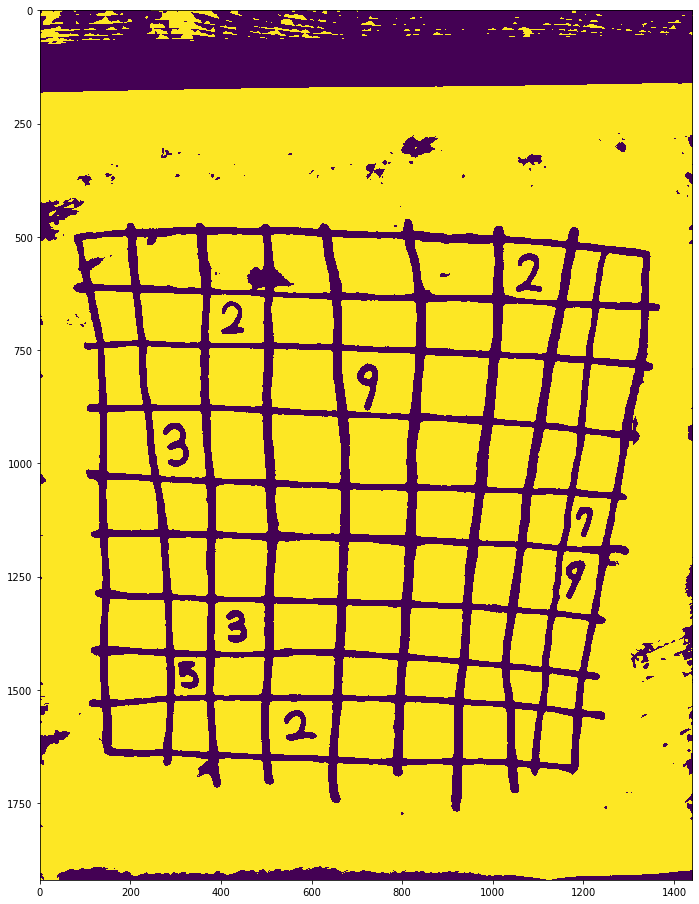

In [8]:
img=cv2.imread('F_test.jpeg')
height,width,channel=img.shape
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_blurred=cv2.GaussianBlur(gray,ksize=(21,21),sigmaX=0)
img_thresh=cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255,
    adaptiveMethod=cv2.THRESH_BINARY,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=211,
    C=2
)
plt.figure(figsize=(15,16))
plt.imshow(img_thresh)

418

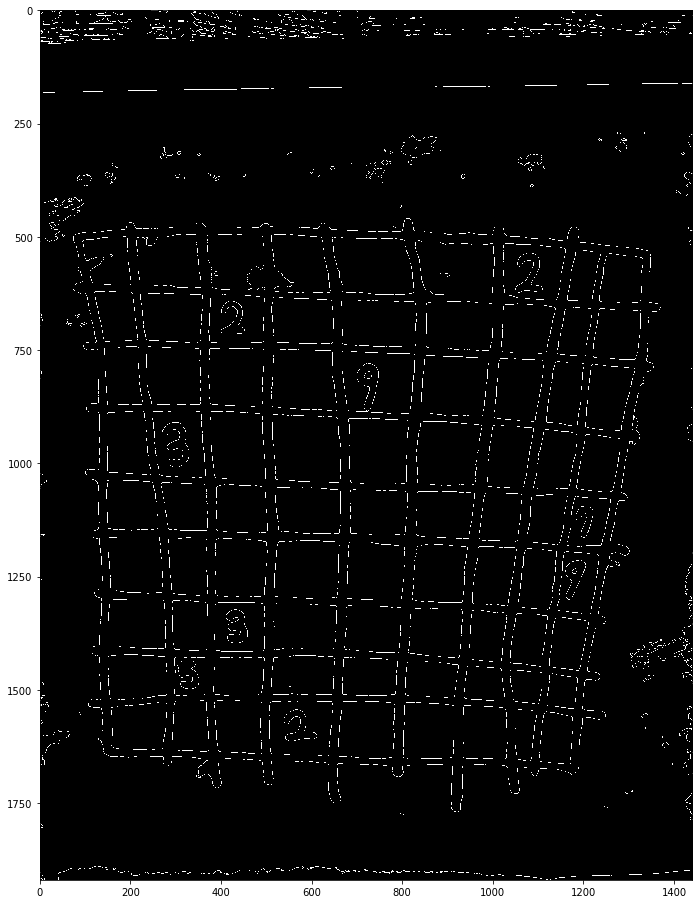

In [9]:
contours,_=cv2.findContours(img_thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
temp_result = np.zeros((height, width, channel), dtype=np.uint8)
cv2.drawContours(temp_result,contours,-1,(255,255,255))
plt.figure(figsize=(18,16))
plt.imshow(temp_result,cmap='gray')
len(contours)

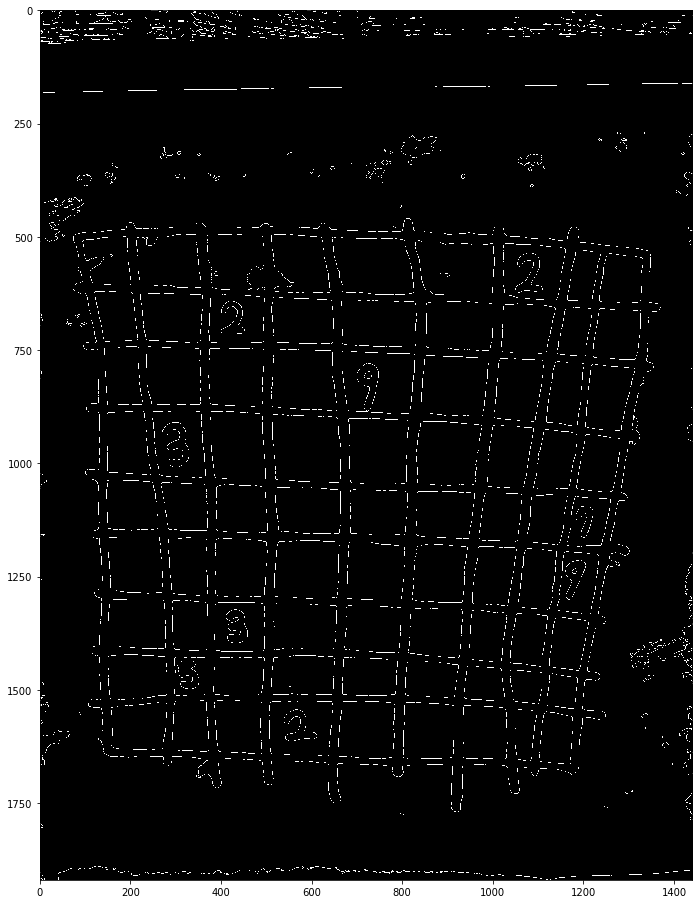

In [10]:
temp_result=np.zeros((height,width,channel),dtype=np.uint8)
cv2.drawContours(temp_result,contours,-1,(255,255,255))
plt.figure(figsize=(18,16))
plt.imshow(temp_result,cmap='gray')

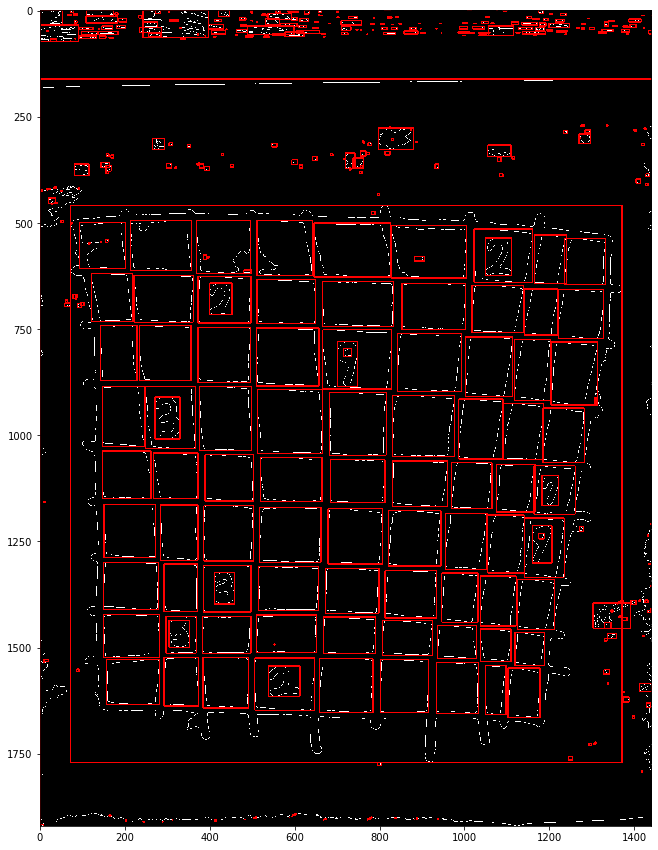

In [11]:
contours_dict=[]
cnt=0
temp_result=np.zeros((height,width,channel),dtype=np.uint8)
cv2.drawContours(temp_result,contours,-1,(255,255,255))
for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    cv2.rectangle(temp_result,(x,y),(x+w,y+h),(255,0,0),2)
    if w>(width/500) and h>(height/50):
        contours_dict.append({
            'contour':contour,
            'x':x,
            'y':y,
            'w':w,
            'h':h,
            'cx':x+(w/2),
            'cy':y+(h/2)
        })
plt.figure(figsize=(16,15))
plt.imshow(temp_result,cmap='gray')


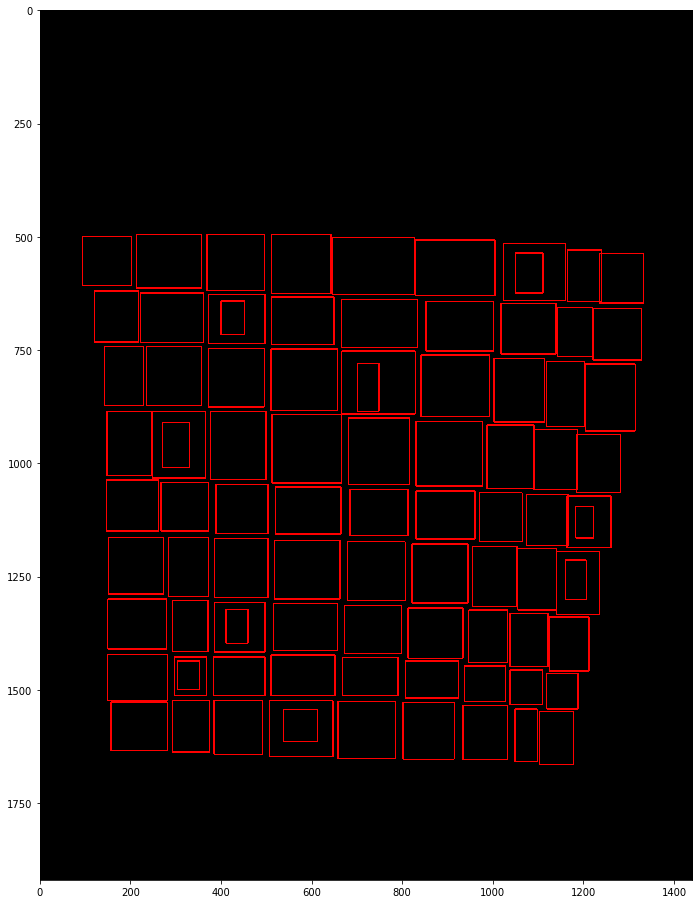

In [12]:
temp=[]
temp_result=[]
allcontours=[]
for d1 in contours_dict:
    for d2 in contours_dict:
        if(d2['w']-(d2['w']/4)<d1['w']<d2['w']+(d2['w']/4) and d2['h']-(d2['h']/2)<d1['h']<d2['h']+(d2['h']/2)):
            cnt+=1
        if cnt>40:
            temp.append(d1)
    cnt=0
pointH1=0
pointH2=0
largeX=0
largeY=0
smallX=temp[0]['x']
smallY=temp[0]['y']
for d1 in temp:
    if(d1['x']>largeX):
        largeX=d1['x']
    if(d1['y']>largeY):
        largeY=d1['y']
        pointH2=d1['h']
    if(d1['x']<smallX):
        smallX=d1['x']
    if(d1['y']<smallY):
        pointH1=d1['h']
        smallY=d1['y']  
for d1 in contours_dict:
    if(smallX-int(pointH2/2)<=d1['x']<=largeX+int(pointH2/2) and (smallY-int(pointH1/5))<=d1['y']<=largeY+(pointH2/5)):
        allcontours.append(d1)

temp_result=np.zeros((height,width,channel),dtype=np.uint8)
#cv2.rectangle(temp_result, pt1=(smallX,(smallY-int(pointH1/5))), pt2=(largeX+int(pointH2/2),int(largeY+(pointH2/2))), color=(0, 0, 255), thickness=2)
for d in allcontours:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 0, 0), thickness=2)

plt.figure(figsize=(15, 16))
plt.imshow(temp_result, cmap='gray')

In [13]:
"""
temp_Sdoku=[]
sudoku=""
rectangle_Count=len(contours_dict)
cnt=0
largecnt=0
possible_digit=[]
while(rectangle_Count>81):
    for d1 in contours_dict:
        for d2 in contours_dict:
            if  d1['x']<d2['x']<d1['x']+d1['w'] and d1['y']<d2['y']<d1['y']+d1['h']:
                cnt += 1
                if(largecnt<cnt):
                    largecnt=cnt
                    temp_Sdoku=d1
        cnt=0
        rectangle_Count=largecnt
    if(largecnt<81):
        print("if ",largecnt)
        if(sudoku==""):
            sudoku=temp_Sdoku
        break;
    else:
        print("else ",largecnt)
        largecnt=0
        sudoku=temp_Sdoku
        contours_dict=deleteLargeRectangle(contours_dict)
if(sudoku==''):
    print("스도쿠를 인식알수 없습니다!")
    exit(0)
temp_result=np.zeros((height,width,channel),dtype=np.uint8)
cv2.rectangle(temp_result, pt1=(sudoku['x'], sudoku['y']), pt2=(sudoku['x']+sudoku['w'], sudoku['y']+sudoku['h']), color=(255, 0, 0), thickness=2)
plt.figure(figsize=(80, 60))
plt.imshow(temp_result, cmap='gray')
largecnt
"""

'\ntemp_Sdoku=[]\nsudoku=""\nrectangle_Count=len(contours_dict)\ncnt=0\nlargecnt=0\npossible_digit=[]\nwhile(rectangle_Count>81):\n    for d1 in contours_dict:\n        for d2 in contours_dict:\n            if  d1[\'x\']<d2[\'x\']<d1[\'x\']+d1[\'w\'] and d1[\'y\']<d2[\'y\']<d1[\'y\']+d1[\'h\']:\n                cnt += 1\n                if(largecnt<cnt):\n                    largecnt=cnt\n                    temp_Sdoku=d1\n        cnt=0\n        rectangle_Count=largecnt\n    if(largecnt<81):\n        print("if ",largecnt)\n        if(sudoku==""):\n            sudoku=temp_Sdoku\n        break;\n    else:\n        print("else ",largecnt)\n        largecnt=0\n        sudoku=temp_Sdoku\n        contours_dict=deleteLargeRectangle(contours_dict)\nif(sudoku==\'\'):\n    print("스도쿠를 인식알수 없습니다!")\n    exit(0)\ntemp_result=np.zeros((height,width,channel),dtype=np.uint8)\ncv2.rectangle(temp_result, pt1=(sudoku[\'x\'], sudoku[\'y\']), pt2=(sudoku[\'x\']+sudoku[\'w\'], sudoku[\'y\']+sudoku[\'h\']),

In [14]:
"""
allcontours=[]
temp_result=np.zeros((height,width,channel),dtype=np.uint8)
for d1 in contours_dict:
    if  sudoku['x']<d1['x']<sudoku['x']+sudoku['w'] and sudoku['y']<d1['y']<sudoku['y']+sudoku['h']:
        allcontours.append(d1)
for d in allcontours:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)
plt.figure(figsize=(80, 60))
plt.imshow(temp_result, cmap='gray')   
"""

"\nallcontours=[]\ntemp_result=np.zeros((height,width,channel),dtype=np.uint8)\nfor d1 in contours_dict:\n    if  sudoku['x']<d1['x']<sudoku['x']+sudoku['w'] and sudoku['y']<d1['y']<sudoku['y']+sudoku['h']:\n        allcontours.append(d1)\nfor d in allcontours:\n    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)\nplt.figure(figsize=(80, 60))\nplt.imshow(temp_result, cmap='gray')   \n"

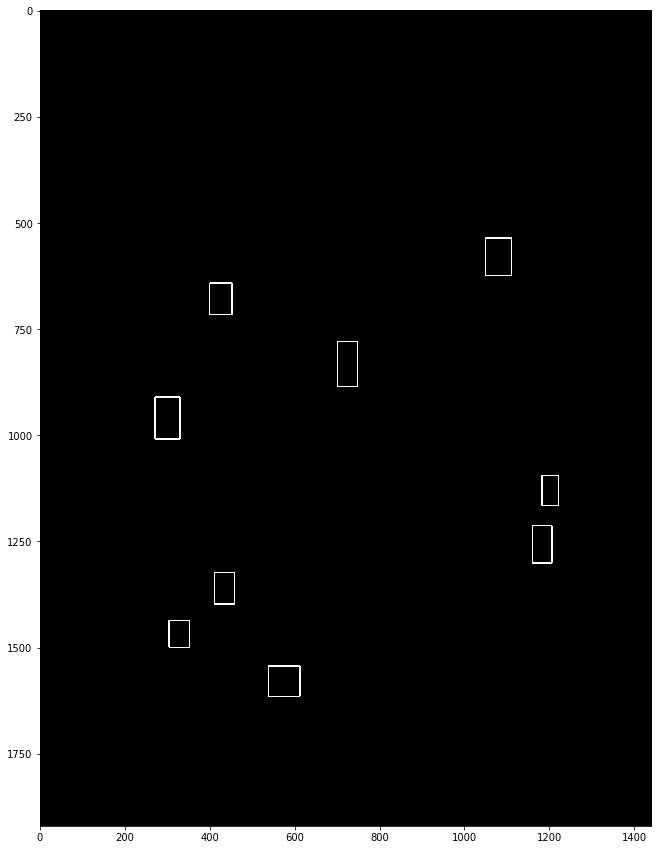

In [15]:
digit=isRectangleinRectangle(allcontours)
digit=deleteRectangleInRectangle(digit,isRectangleinRectangle(digit))
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in digit:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)
plt.figure(figsize=(16, 15))
plt.imshow(temp_result, cmap='gray')
        

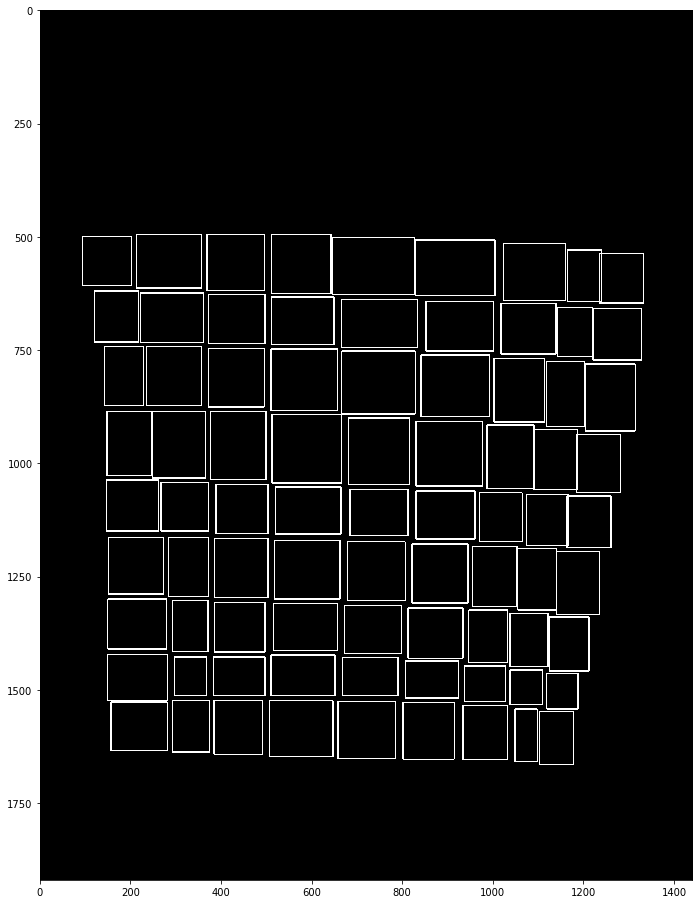

In [16]:
#사각형 추출
allcontours=deleteRectangleInRectangle(allcontours,digit)
temp_result = np.zeros((height, width, channel), dtype=np.uint8)
for d in allcontours:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)
plt.figure(figsize=(15, 16))
plt.imshow(temp_result, cmap='gray')


In [17]:
listarr=[]
digit=sortRectangle(digit)
for i in range(len(digit)):
    img_cropped=cv2.getRectSubPix(
        img,
        patchSize=(int(digit[i]['w']),int(digit[i]['h'])),
        center=(int(digit[i]['cx']),int(digit[i]['cy']))
    )
    char=pytesseract.image_to_string(img_cropped,lang='kor',config='--psm 7 --oem 0 -c tessedit_char_whitelist=123456789')
    if(char!='' and 0<int(char[0])<10):
        listarr.append(char[0])
    else:
        listarr.append(-1)


In [ ]:
listAnswer=[]
isblank=True
cnt=0
allcontours=sortRectangle(allcontours)


for d1 in allcontours:
    for d2 in digit:
        if  d1['x']<d2['x']<d1['x']+d1['w'] and d1['y']<d2['y']<d1['y']+d1['h']:
            listAnswer.append(int(listarr[cnt]))
            cnt=cnt+1
            isblank=False
    if(isblank==True):
        listAnswer.append(0)
    isblank=True
        

In [54]:
row=[]
sudoku=[]
for i in range(9):
    for j in range(i*9,(i*9)+9):
        row.append(listAnswer[j])
    sudoku.append(row)
    row=[]


In [55]:
sudoku.reverse()
sudoku

[[0, 0, 0, 0, 0, 0, 2, 0, 0],
 [0, 0, 2, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 3, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 7],
 [0, 0, 0, 0, 0, 0, 0, 0, 4],
 [0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 5, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 2, 0, 0, 0, 0, 0]]

In [57]:
print("잘못 인식한 부분을 수정해 주세요!! 종료:Q")
for i in range(9):
    print("")
    for j in range(9):
        print(sudoku[i][j],",",end='')
while(True):
    column=input("행입력 종료 Q: ")
    if(column=='Q' or column=='q'):
        break
    else:
        column=int(column)
        row=int(input("열입력: "))
        value=int(input("숫자입력: "))
        sudoku[column-1][row-1]=value
    print("\n==============")
    for i in range(9):
        print("")
        for j in range(9):
            print(sudoku[i][j],",",end='')
solve(sudoku)

잘못 인식한 부분을 수정해 주세요!! 종료:Q

0 ,0 ,0 ,0 ,0 ,0 ,2 ,0 ,0 ,
0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,
0 ,3 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,7 ,
0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,4 ,
0 ,0 ,3 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,5 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,행입력 종료 Q: 3
열입력: 5
숫자입력: 9


0 ,0 ,0 ,0 ,0 ,0 ,2 ,0 ,0 ,
0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,0 ,9 ,0 ,0 ,0 ,0 ,
0 ,3 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,7 ,
0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,4 ,
0 ,0 ,3 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,5 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,행입력 종료 Q: 6
열입력: 9
숫자입력: 9


0 ,0 ,0 ,0 ,0 ,0 ,2 ,0 ,0 ,
0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,0 ,9 ,0 ,0 ,0 ,0 ,
0 ,3 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,7 ,
0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,9 ,
0 ,0 ,3 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,5 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,
0 ,0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,행입력 종료 Q: q

[9, 8, 7, 6, 5, 4, 2, 3, 1] 
[6, 4, 2, 8, 3, 1, 9, 7, 5] 
[3, 1, 5, 7, 9, 2, 8, 6, 4] 
[8, 3, 9, 5, 7, 6, 4, 1, 2] 
[5, 6, 4, 1, 2, 9, 3, 8, 7] 
[7, 